# Assignment 2: predict insurance charges
#### Application of linear regression, decision tree, random forests and gradient boosting

In this assignment you'll predict insurance charges using 6 attributes of customers of a health insurance company. The data is stored in inurance.csv.

### 1 Import libraries and dataset
- import the relevant libraries to load, analyze and visualize the data

In [52]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

### 1A import and inspect files
- Load the csv file into a dataframe
- Inspect the dataframe

In [53]:
df = pd.read_csv("insurance.csv")
display(df.head(), df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2 Convert to numeric and histograms


### 2A convert to numeric
- Three columns contain non-numeric data. Convert the data in these columns to numeric data.
- There are multiple ways to convert non-numeric data. One method is to use the Label Encoder in sklearn.

In [54]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [55]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

"""
from sklearn import preprocessing
encoder = preprocessing.LabelEnconder()

df['sex'] = pd.to_numeric(encoder.fit_transform(df["sex"])
df['smoker'] = pd.to_numeric(encoder.fit_transform(df["smoker"])
df['region'] = pd.to_numeric(encoder.fit_transform(df["region])

but better use dummy columns for region 
"""

'\nfrom sklearn import preprocessing\nencoder = preprocessing.LabelEnconder()\n\ndf[\'sex\'] = pd.to_numeric(encoder.fit_transform(df["sex"])\ndf[\'smoker\'] = pd.to_numeric(encoder.fit_transform(df["smoker"])\ndf[\'region\'] = pd.to_numeric(encoder.fit_transform(df["region])\n\nbut better use dummy columns for region \n'

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### 2B histograms
- Create a histogram of each variable in the dataset

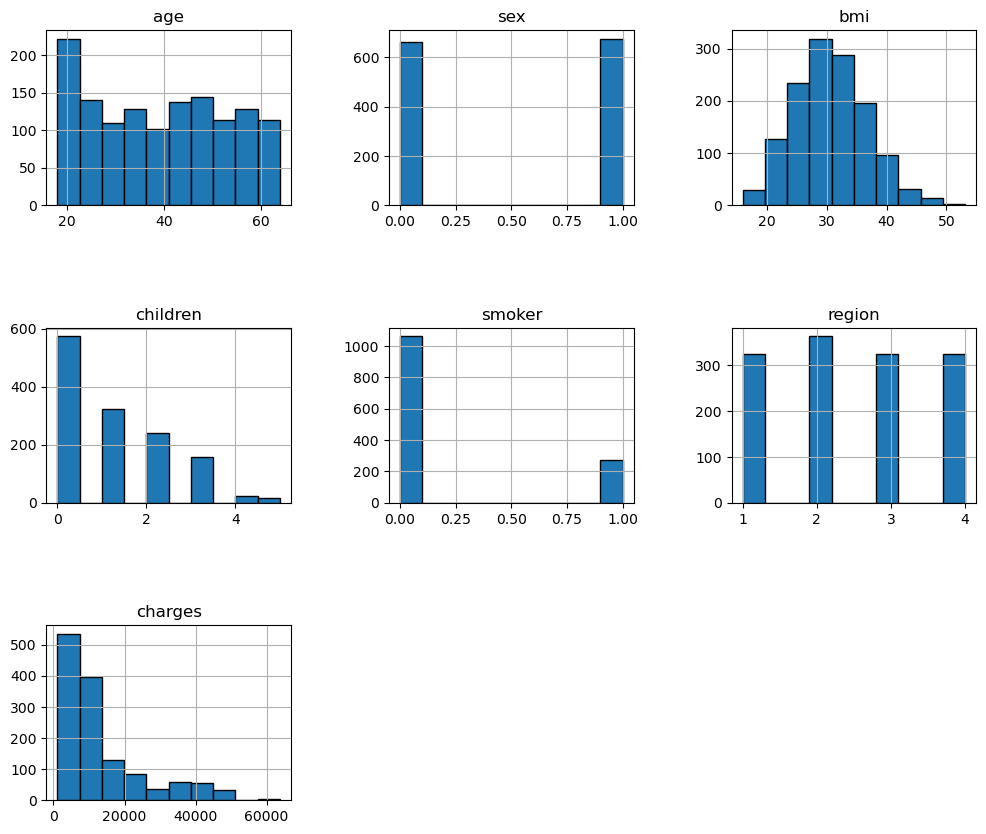

In [57]:
df.hist(figsize=(12, 10), bins=10, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## 3 Correlations, heatmap and boxplots

### 3A correlations
- Create a bar chart that shows the correlations between the independent variables and the dependent variable (charges).

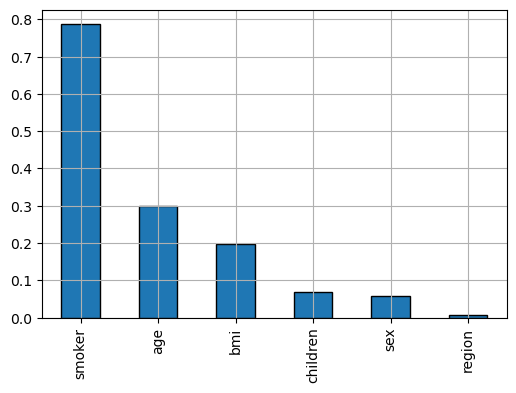

In [68]:
df.corr()["charges"][:-1].sort_values(ascending=False).plot(kind="bar",figsize=(6, 4), edgecolor="black", width=0.5)
plt.grid()
plt.show()
# sns.catplot(x=X, y=y,data=df figsize=(12, 6), kind="bar", width=1)

### 3B heat map
- Create a heat map that visualizes the correlations between all variables.

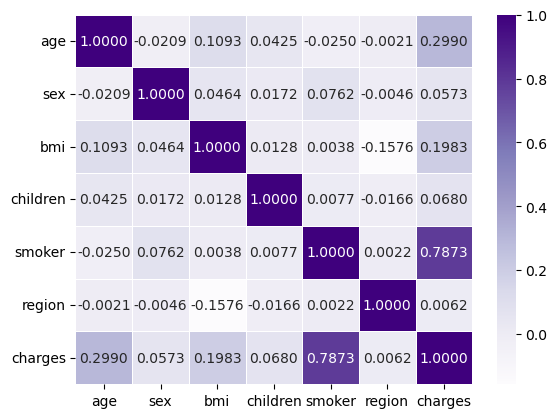

In [71]:
sns.heatmap(df.corr(), annot=True, cmap="Purples", fmt=".4f", linewidths=.6)
plt.show()

### 3C Boxplots
- Create a chart that shows boxplots of all independent variables.

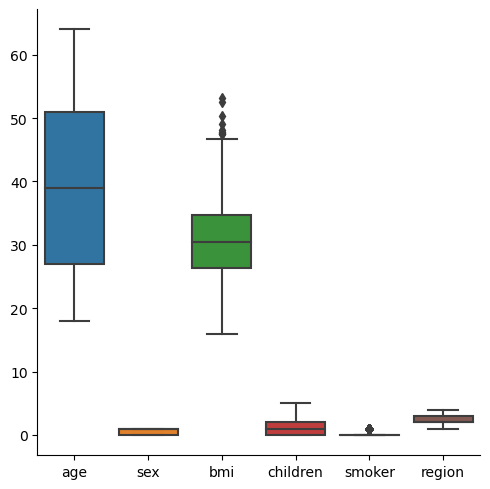

In [82]:
# charges is our target, dependent.
X = df.drop('charges',axis=1)
y = df['charges']

sns.catplot(kind="box", data=X, legend_out=True)

### 3D Outliers
- Which variable(s) have outliers? 
- Name 3 potential approaches to deal with these outliers. 
- What are the pro's and con's of each approach?

In [12]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

<AxesSubplot:>

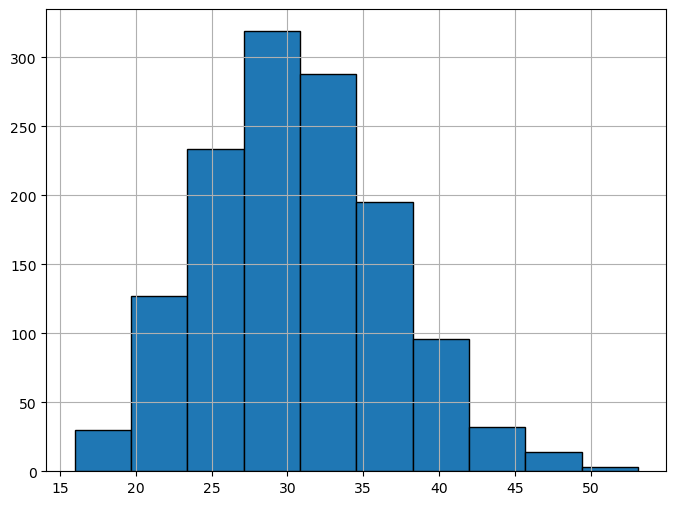

In [59]:
# bmi has some outliers,
# shows smoker also with outliers tho i think it has to do with having not many smokers in data

X.describe()
df["bmi"].hist(figsize=(8, 6), bins=10, edgecolor="black")

# well the shown outliers in this dataframe in general not really big outliers
# cant really remove them because they are not unrealistic in all independent columns
# i think i ll keep it as it is.

# but if we are going to work with linear regression model as this file is named, 
# i think i ll have to make some choices between which columns to use an not to use.

## 4 Linear models

### 4A train-test plit
- Split the data into a train set and a test set

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 4B Linear regression
- Apply linear regression to predict insurance charges.
- Determine the performance score of the training set
- Determine the performance score of the test set
- What are the regression coefficients? To what extent are they related to the correlation coefficients you found in the heatmap?

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [16]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
print(reg.coef_)
print("____________________")
print(reg.intercept_)

0.741543685283998
0.7846787657791239
[  257.28807486  -131.11057962   332.57013224   479.36939355
 23820.43412267   353.64001656]
____________________
-13230.012387466733


In [19]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

C:\Users\nurta\AppData\Local\Temp\ipykernel_15044\3936244503.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, -13230*x+257, '-r', label='age', color="b")


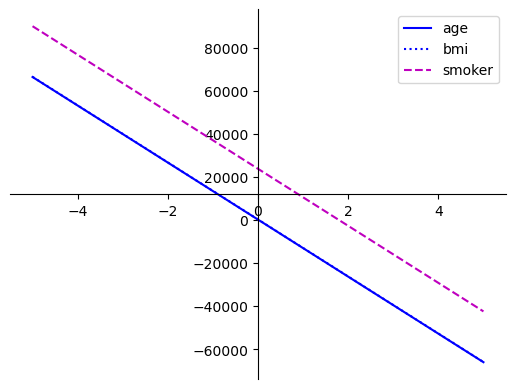

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# using highest 3 correlations on our heatmap for age bmi and smoker
# using reg.coef_ and reg.intercept_ values tp draw the lines
plt.plot(x, -13230*x+257, '-r', label='age', color="b")
plt.plot(x, -13230*x+332,':b', label='bmi')
plt.plot(x, -13230*x+23820,'--m', label='smoker')

plt.legend(loc='upper right')
plt.show()

### 4C Ridge
- Apply ridge regression to predict insurance charges. Run the ridge regression at least 4 times with different values of alpha. Each run should be in a different cell.
- Explain what the alpha parameter does. Show the regression coefficients of each of the 4 runs to illustrate your answer.
- Determine the accuracy of the train set and of the test set of each run.
- Explain your choice for each alpha value. 
- What alpha value is best? Explain your answer.

0.7416842834992985
0.7830849126391299
[ 2.56851914e+02 -1.10521788e+01  3.35794374e+02  4.25541725e+02
  2.35122105e+04  2.71476626e+02]
-13001.154445440969

____________________



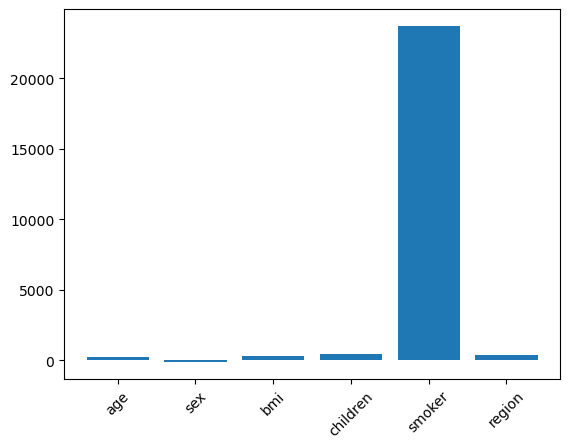

In [89]:
from sklearn.linear_model import Ridge
alpha_list= [0.1, 0.5, 2, 8]
names = df.drop('charges',axis=1).columns


ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(ridge.coef_)
print(ridge.intercept_)
print("\n____________________\n")
    
ridge_coef = ridge.fit(X, y).coef_

plt.bar(names, ridge_coef)
plt.xticks(rotation=45)
plt.show()
    
# it changes coefficient and intercept but doesnt change the score that much

0.7417047197204536
0.7833217621706015
[ 2.57035723e+02 -1.80109296e+01  3.35782790e+02  4.25136864e+02
  2.36341868e+04  2.71303705e+02]
-13028.670679899356

____________________



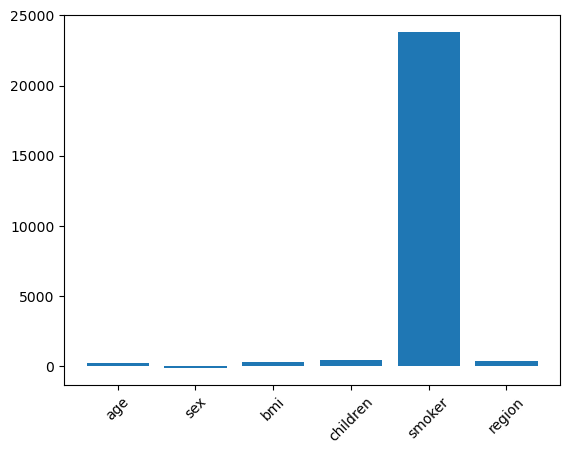

In [90]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(ridge.coef_)
print(ridge.intercept_)
print("\n____________________\n")
    
ridge_coef = ridge.fit(X, y).coef_

plt.bar(names, ridge_coef)
plt.xticks(rotation=45)
plt.show()
    

0.7416997372947685
0.7832200105774039
[ 2.56953795e+02 -1.49035393e+01  3.35787964e+02  4.25317646e+02
  2.35798187e+04  2.71381009e+02]
-13016.410143313851

____________________



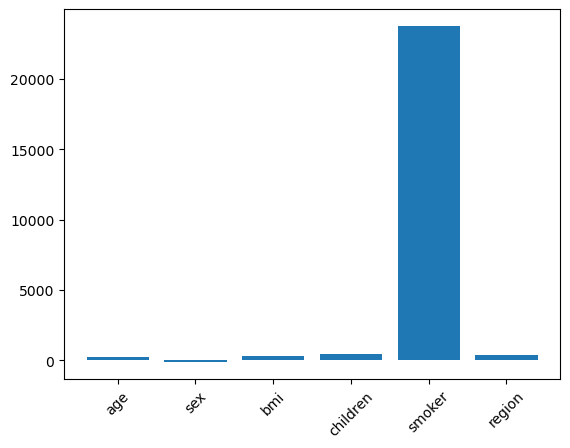

In [91]:
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(ridge.coef_)
print(ridge.intercept_)
print("\n____________________\n")
    
ridge_coef = ridge.fit(X, y).coef_

plt.bar(names, ridge_coef)
plt.xticks(rotation=45)
plt.show()
    

0.7404839698249384
0.7803531041888
[  255.4844857     39.24003956   335.87789098   428.46709961
 22604.95454331   272.70219333]
-12795.400772228184

____________________



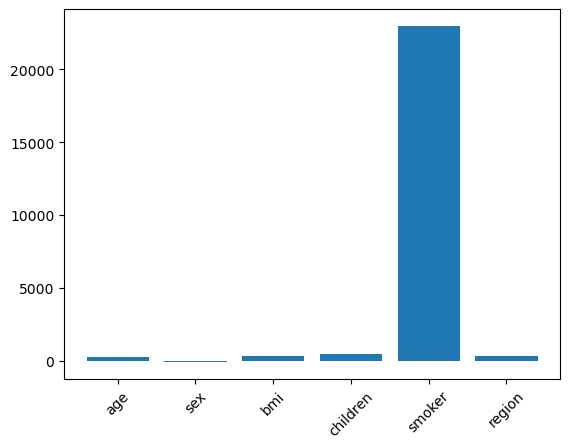

In [92]:
ridge = Ridge(alpha=8).fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(ridge.coef_)
print(ridge.intercept_)
print("\n____________________\n")
    
ridge_coef = ridge.fit(X, y).coef_

plt.bar(names, ridge_coef)
plt.xticks(rotation=45)
plt.show()

### 4D Lasso
- Apply lasso regression to predict insurance charges. Run the lass0 regression at least 4 times with different values of alpha. Each run should be in a different cell.
- Explain what the alpha parameter does. Show the regression coefficients and number of features used of each of the 4 runs to illustrate your answer.
- Determine the accuracy of the train set and of the test set of each run.
- Explain your choice for each alpha value. 
- What alpha value is best? Explain your answer.

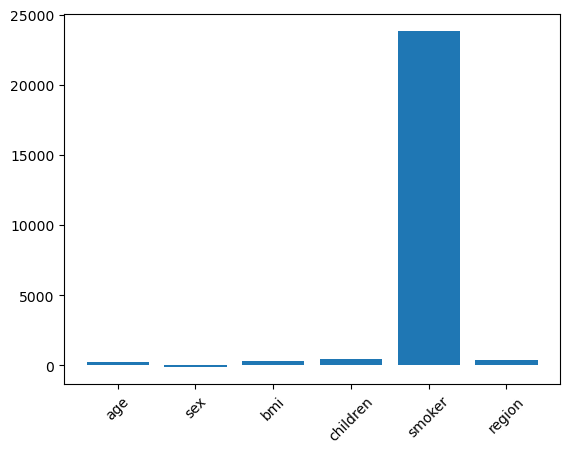

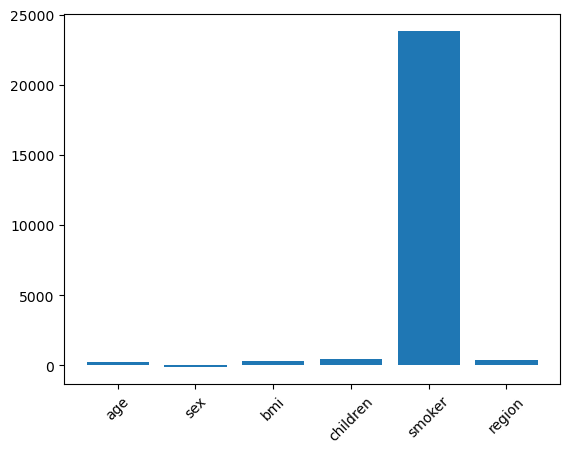

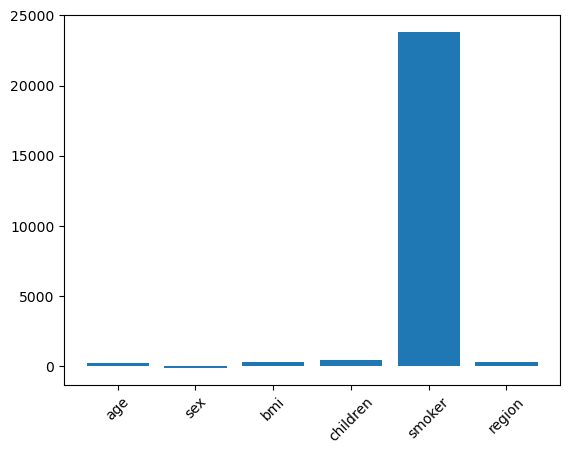

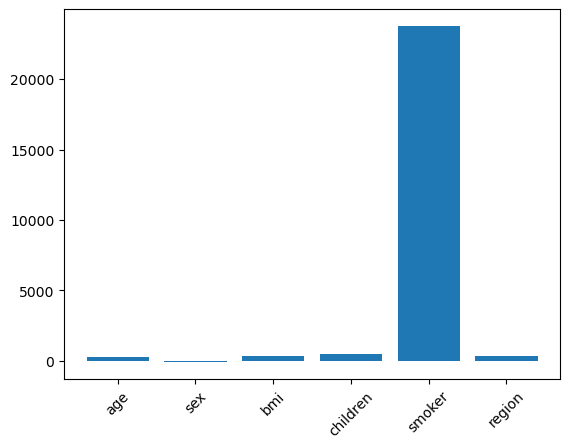

In [93]:
from sklearn.linear_model import Lasso
alpha_list= [0.1, 0.6, 2.5, 10]
names = df.drop('charges',axis=1).columns

for value in alpha_list:
    lasso = Lasso(alpha=value)
    lasso_coef = lasso.fit(X, y).coef_

    plt.bar(names, lasso_coef)
    plt.xticks(rotation=45)
    plt.show()
    
# i am doing something wrong or alpha doesnt change that much on this dataset

## 5 Decision tree

### 5A Decision tree regressor
- Apply the decision tree regressor to predict insurance charges. Run the tree regressor at least 4 times with different values of the max_depth parameter. Each run should be in a different cell.
- Determine the accuracy of the train set and of the test set of each run.
- Explain what the max_depth parameter does. Compare training set accuracy with test set accuracy to illustrate your answer.
- With which settings does the model perform best? Explain your answer.

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=4,random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.8653110840097293
0.8641310379678357


In [28]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=1,random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.6084975246707405
0.6602486589056529


In [27]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=2,random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.8234662930236613
0.8320641117145591


In [26]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=10,random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9693214970872615
0.7307880956708597


### 5B Print tree
- Print the decision tree of the settings with the best performance.
Hint: use this link to find more information about printing decision trees: https://mljar.com/blog/visualize-decision-tree/
- Which variables are most important for predicting insurance charges? Explain your answer.

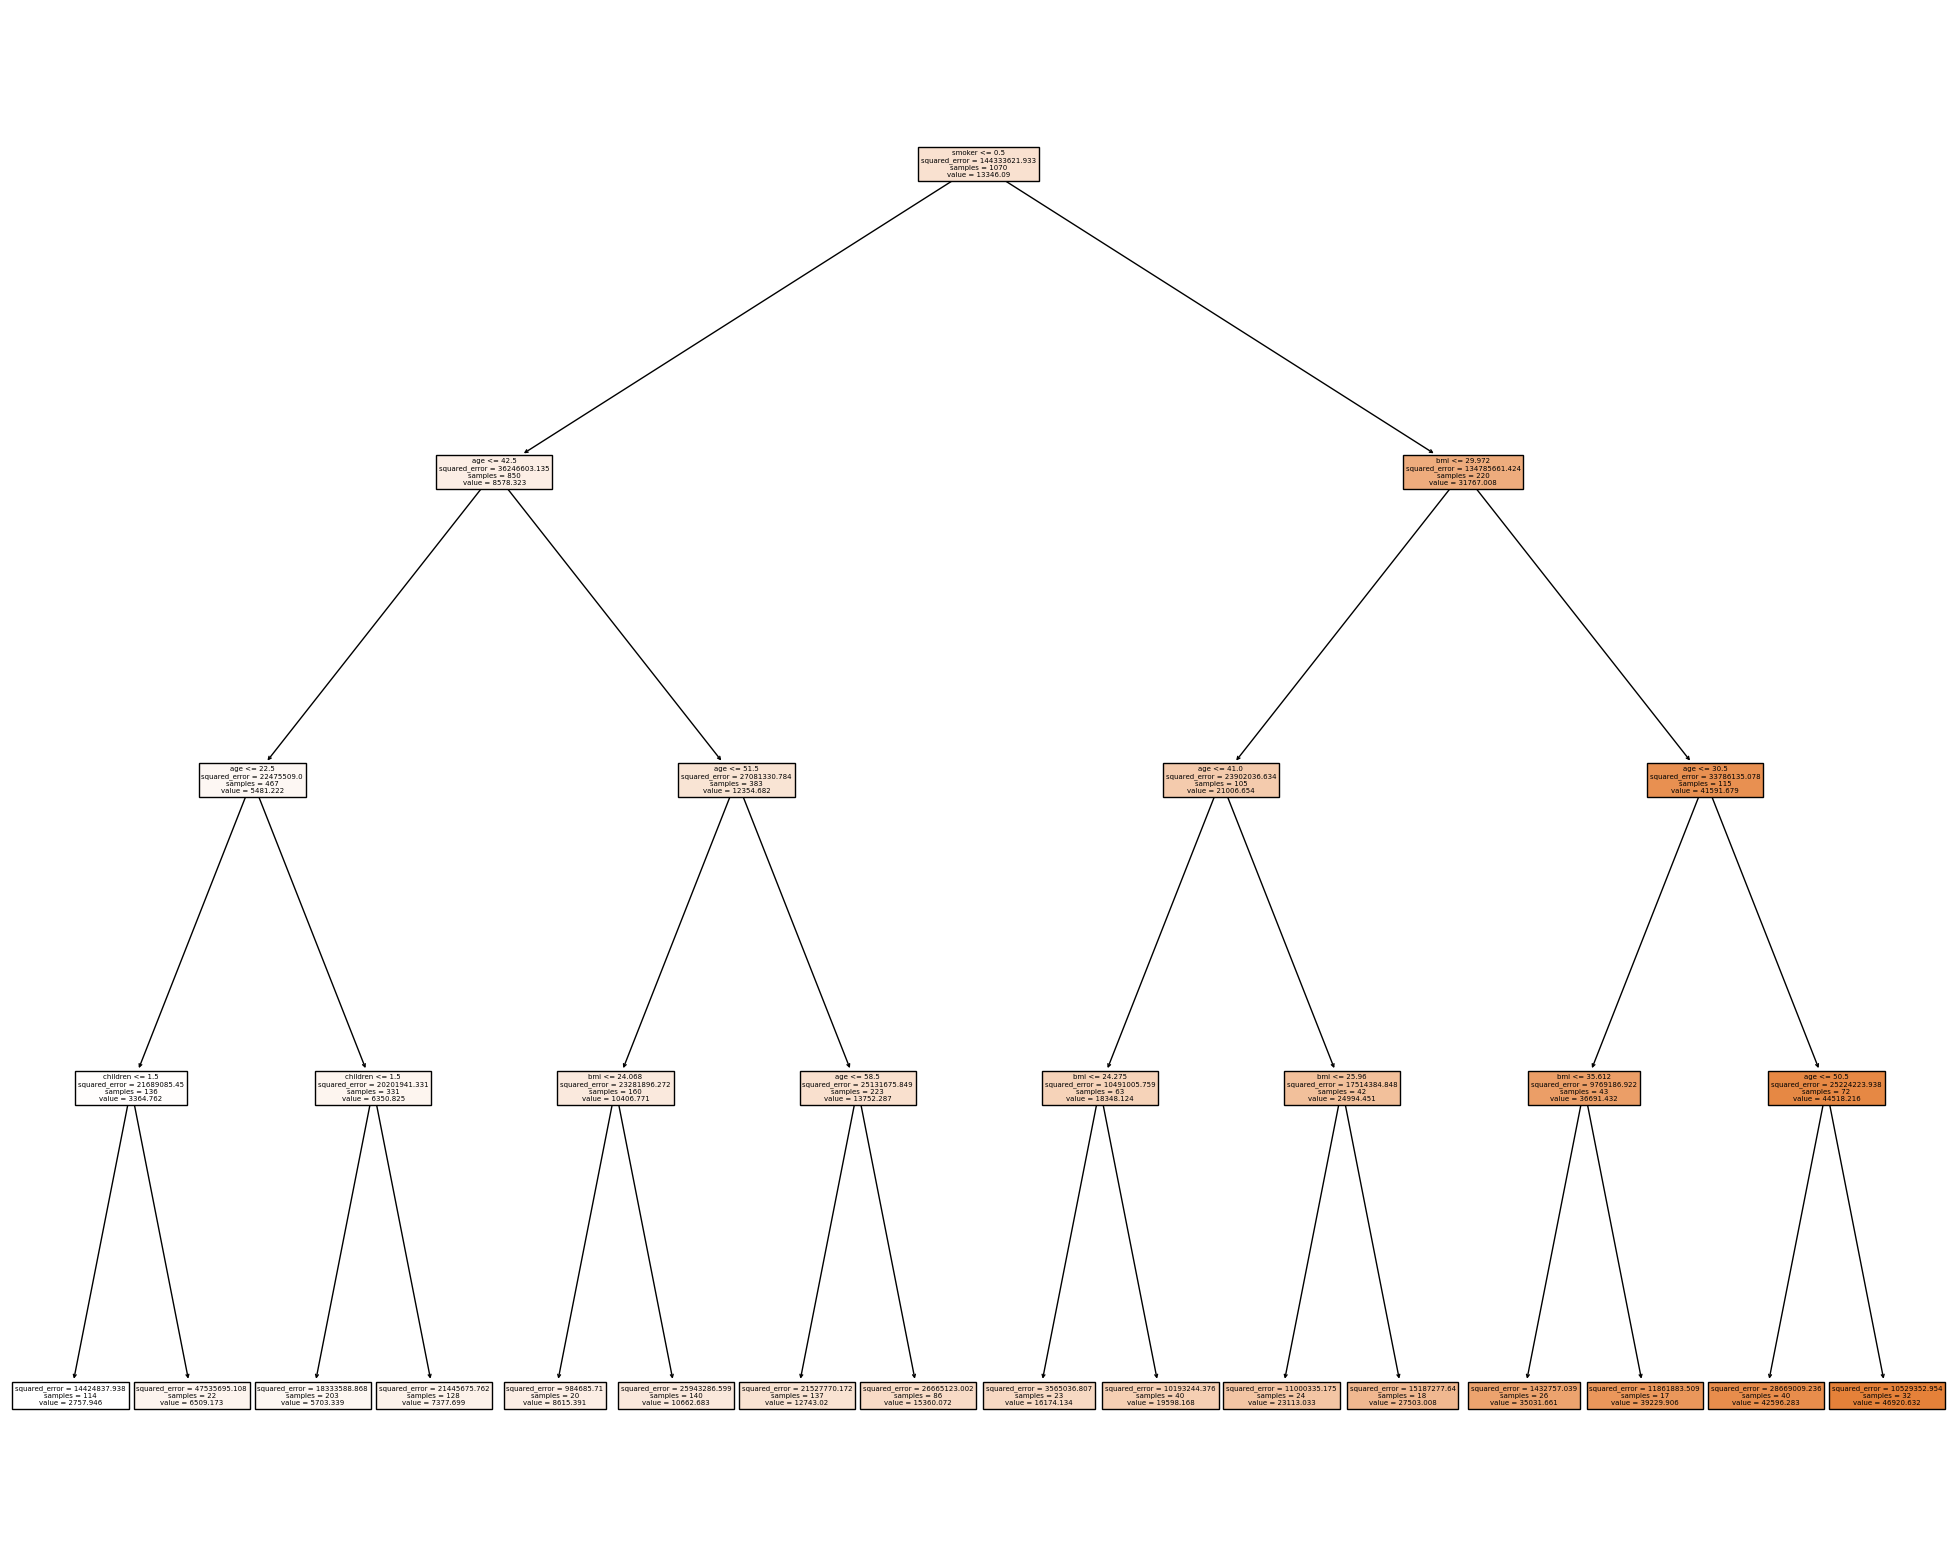

In [25]:
from sklearn import tree as tr
fig = plt.figure(figsize=(25,20))
tr.plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()


### 5C Feature importance
Do some research to find out about feature importance and how to determine this using sklearn. 
- What is feature importance of a decision tree?
- Determine and plot the feature importance of your model.

## 6 Random forest

### 6A Random forest regressor
- Apply the random tree regressor to predict insurance charges. 
- Run the regressor with different values for the parameter that determines the number of trees. Which value returns the best result?
- Try some of the other parameters of the model. What is the impact of these parameters?
- Explain what the max_leaf_nodes parameter does? How does it impact the performance of your model?
- With which settings does the model perform best? Explain your answer.

### 6B Feature importance
- Determine and plot the feature importance of your model.

## 7 Gradient boosting

### 7A Gradient Boosting regressor
- Apply the gradient boosting regressor to predict insurance charges. 
- Run the regressor with different values for the parameter that determines the depth of the trees. Which value returns the best result?
- Try some of the other parameters of the model. What is the impact of these parameters?
- Explain what the learning_rate parameter does? How does it impact the performance of your model?
- With which settings does the model perform best? Explain your answer.

### 7B Feature importance
- Determine and plot the feature importance of your model.